In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10

(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
soHot = OneHotEncoder(sparse=False)

soHot.fit(trainY)
trainY = np.array(soHot.transform(trainY))
testY = np.array(soHot.transform(testY))

/home/dingo/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# Potato Model

Does not work b/c it's basically just a preceptron

In [10]:
potato = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=trainX.shape[1:],activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
potato.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 10
history = potato.fit(trainX, 
                      trainY, 
                      epochs=epochs,  
                      validation_data=(testX, testY))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 237us/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
50000/50000 [==============================] - 11s 229us/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 12s 231us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 12s 232us/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 12s 232us/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 12s 233us/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================] 

In [12]:
test_loss , test_acc = potato.evaluate(testX, testY)

print('Long live the potato!')
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

10000/10000 [==============================] - 1s 95us/step
Long live the potato!
Test accuracy: 0.10000000149011612
Test Loss: 2.3026190574645997


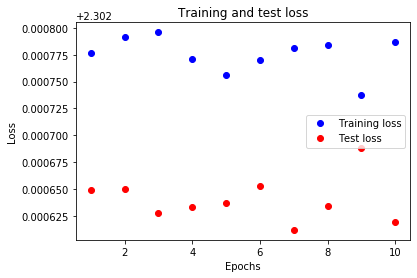

In [13]:
histoire = history.history
loss_values = histoire['loss']
test_loss_values = histoire['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Overfitted Model

This model doesn't do a good job of generalising.

Trained for way too many epochs, and has no dropout layers :(

In [35]:
trashPotato = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=trainX.shape[1:],activation=tf.nn.relu),
    keras.layers.Conv2D(32, (3, 3), padding='same',activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same',activation=tf.nn.relu),
    keras.layers.Conv2D(64, (3, 3), padding='same',activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [36]:
trashPotato.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 50
history = trashPotato.fit(trainX, 
                      trainY, 
                      epochs=epochs,  
                      validation_data=(testX, testY),
                      verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3108 - accuracy: 0.5259 - val_loss: 0.9969 - val_accuracy: 0.6483
Epoch 2/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.8461 - accuracy: 0.7028 - val_loss: 0.8369 - val_accuracy: 0.7108
Epoch 3/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6442 - accuracy: 0.7752 - val_loss: 0.8154 - val_accuracy: 0.7239
Epoch 4/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.4742 - accuracy: 0.8337 - val_loss: 0.7822 - val_accuracy: 0.7418
Epoch 5/50
50000/50000 [==============================] - 57s 1ms/step - loss: 0.3257 - accuracy: 0.8863 - val_loss: 0.8824 - val_accuracy: 0.7485
Epoch 6/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.2079 - accuracy: 0.9274 - val_loss: 1.0237 - val_accuracy: 0.7491
Epoch 7/50
50000/50000 [==============================] - 56s 1ms/st

In [37]:
test_loss , test_acc = potato.evaluate(testX, testY)

print('Long live the potato!')
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

10000/10000 [==============================] - 1s 94us/step
Long live the potato!
Test accuracy: 0.10000000149011612
Test Loss: 2.3026190574645997


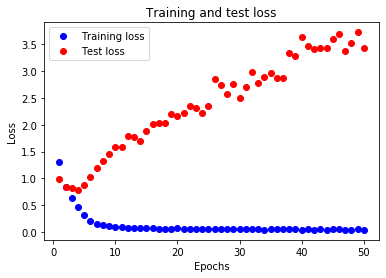

In [38]:
histoire = history.history
loss_values = histoire['loss']
test_loss_values = histoire['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Good model

In [28]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=trainX.shape[1:],activation=tf.nn.relu),
    keras.layers.Conv2D(32, (3, 3), padding='same',activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3), padding='same',input_shape=trainX.shape[1:],activation=tf.nn.relu),
    keras.layers.Conv2D(64, (3, 3), padding='same',activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [29]:
opti = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opti,
              metrics=['accuracy'])

epochs = 40
history = model.fit(trainX, 
                      trainY, 
                      epochs=epochs,  
                      validation_data=(testX, testY),
                      verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 55s 1ms/step - loss: 1.7657 - accuracy: 0.3557 - val_loss: 1.5041 - val_accuracy: 0.4669
Epoch 2/40
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4297 - accuracy: 0.4847 - val_loss: 1.2619 - val_accuracy: 0.5570
Epoch 3/40
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2726 - accuracy: 0.5467 - val_loss: 1.2117 - val_accuracy: 0.5670
Epoch 4/40
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1639 - accuracy: 0.5876 - val_loss: 1.0963 - val_accuracy: 0.6154
Epoch 5/40
50000/50000 [==============================] - 54s 1ms/step - loss: 1.0755 - accuracy: 0.6194 - val_loss: 0.9959 - val_accuracy: 0.6482
Epoch 6/40
50000/50000 [==============================] - 55s 1ms/step - loss: 1.0100 - accuracy: 0.6437 - val_loss: 0.9354 - val_accuracy: 0.6673
Epoch 7/40
50000/50000 [==============================] - 56s 1ms/st

In [30]:
test_loss , test_acc = potato.evaluate(testX, testY)

print('Long live the potato!')
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

10000/10000 [==============================] - 1s 89us/step
Long live the potato!
Test accuracy: 0.10000000149011612
Test Loss: 2.3026190574645997


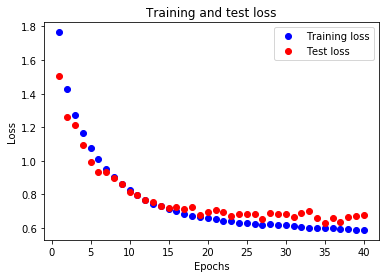

In [31]:
histoire = history.history
loss_values = histoire['loss']
test_loss_values = histoire['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()